# Analysis of the popular GoFast scooter rental service.

Data on some users from several cities and their rides have been provided. It is necessary to analyze the data and check some hypotheses that may help the business grow.

Riding around the city, users of the GoFast service use a mobile application. The service can be used in two ways:
- without a subscription
  - no subscription fee;
  - the cost of one minute of ride is 8 rubles;
  - the cost of starting ride is 50 rubles;
- with an Ultra subscription
  - subscription fee - 199 rubles per month;
  - the cost of one minute of ride is 6 rubles;
  - the cost of starting ride is free.

**Data Description**.
The main data includes information about users, their rides, and subscriptions.

Users - **users_go.csv**
* user_id - unique user identifier
* name - user's name
* age - age
* city - city
* subscription_type - subscription type (free, ultra)

Trips - **rides_go.csv**
* user_id - unique user identifier
* distance - the distance the user rided in the current session (in meters)
* duration - session duration (in minutes) - the time from when the user pressed the "Start ride" button until he pressed the "End ride" button
* date - date of the ride

Subscriptions - **subscriptions_go.csv**
* subscription_type - subscription type
* minute_price - cost of one minute of ride under this subscription
* start_ride_price - ride start price
* subscription_fee - monthly subscription fee

# Project Summary

[1. Data loading](#1.-Data-loading)

[2. Data preprocessing](#2.-Data-preprocessing)
   - [Task 1. Check missing data in dataframes](#Task-1.-Check-missing-data-in-dataframes)
   - [Task 2. Add month to dataframe `rides`](#Task-2.-Add-month-to-dataframe-rides)
   - [Task 3. Checking several columns for indicating implicit duplicates - name, city, subscription_type. Explicit duplicates were not found.](#Task-3.-Checking-several-columns-for-indicating-implicit-duplicates---name-city-subscription_type.-Explicit-duplicates-were-not-found.)
   
[3. Exploratory data analysis](#3.-Exploratory-data-analysis)
   - [Task 1. Frequency of cities occurrence;](#Task-1.-Frequency-of-cities-occurrence;)
   - [Task 2. Ratio of users with and without a subscription;](#Task-2.-Ratio-of-users-with-and-without-a-subscription;)
   - [Task 3. User's age;](#Task-3.-User's-age;)
   - [Task 4. Distance per 1 ride per user;](#Task-4.-Distance-per-1-ride-per-user;)
   - [Task 5. Rides duration.](#Task-5.-Rides-duration.)
   
[4. Data merging](#4.-Data-merging)
   - [Task 1. Merging data of users, rides and subscriptions to uniformed dataframe.](#Task-1.-Merging-data-of-users,-rides-and-subscriptions-to-uniformed-dataframe.)
   - [Task 2. Create new 2 dataframes from merged dataframe:](#Task-2.-Create-new-2-dataframes-from-merged-dataframe:)
   
[5. Revenue calculation](#5.-Revenue-calculation)
   - [Task 1. Creating a dataframe with aggregated rides data based on the dataframe with combined data from 4 sections: finding the total distance, number of rides, and total ride duration for each user per each month.](#Task-1.-Creating-a-dataframe-with-aggregated-rides-data-based-on-the-dataframe-with-combined-data-from-4-sections:-finding-the-total-distance,-number-of-rides,-and-total-ride-duration-for-each-user-per-each-month.)
   - [Task 2. Add column with monthly revenue](#Task-2.-Add-column-with-monthly-revenue)
[6. Hypotheses testing](#6.-Hypotheses-testing)
   - [Task 1. Testing whether ultrs users spend more time on rides. If so, users with a subscription may be "more profitable" for the company.](#Task-1.-Testing-whether-ultrs-users-spend-more-time-on-rides.-If-so,-users-with-a-subscription-may-be-"more-profitable"-for-the-company.)
   - [Task 2. Distance of 1 ride as 3130 m is optimal in terms of scooter wear and tear. Is it true that average  distance for ultra user per 1 ride not higher than 3130 m?](#Task-2.-Distance-of-1-ride-as-3130-m-is-optimal-in-terms-of-scooter-wear-and-tear.-Is-it-true-that-average-distance-for-ultra-user-per-1-ride-not-higher-than-3130-m?)
   - [Task 3. Testing hypothesis of  monthly revenue: Is monthly revenue of ultra users higher than of free users?](#Task-3.-Testing-hypothesis-of--monthly-revenue:-Is-monthly-revenue-of-ultra-users-higher-than-of-free-users?)
   - [Task 4. Imagine a situation: the technical team of the service has updated the servers with which the mobile application interacts. She hopes that because of this, the number of calls to technical support has significantly decreased. Some file contains data for each user on the number of requests before and after the update. What stat test would you need to test this hypothesis?](#Task-4.-Imagine-a-situation:-the-technical-team-of-the-service-has-updated-the-servers-with-which-the-mobile-application-interacts.-She-hopes-that-because-of-this,-the-number-of-calls-to-technical-support-has-significantly-decreased.-Some-file-contains-data-for-each-user-on-the-number-of-requests-before-and-after-the-update.-What-stat-test-would-you-need-to-test-this-hypothesis?)
   
[7. Distributions](#7.-Distributions)
   - [Task 1. The GoFast marketing department has been given a task: it is necessary to hold an action with the distribution of promo codes for one month of free subscription, where at least 100 existing customers must renew this subscription. User can either cancel it or extend it by making the appropriate payment at the end of the subscription period](#Task-1.-The-GoFast-marketing-department-has-been-given-a-task:-it-is-necessary-to-hold-an-action-with-the-distribution-of-promo-codes-for-one-month-of-free-subscription,-where-at-least-100-existing-customers-must-renew-this-subscription.-User-can-either-cancel-it-or-extend-it-by-making-the-appropriate-payment-at-the-end-of-the-subscription-period)
   - [Task 2. The marketing department sends push notifications to customers in mobile app. Customers can open it or not open it. It is known that about 40% of received clients open notifications. Department plans to send out 1 million notifications. Use the approximation to build approximate distribution graph and estimate probability that no more than 399.5 thousand users open notification.](#Task-2.-The-marketing-department-sends-push-notifications-to-customers-in-mobile-app.-Customers-can-open-it-or-not-open-it.-It-is-known-that-about-40%-of-received-clients-open-notifications.-Department-plans-to-send-out-1-million-notifications.-Use-the-approximation-to-build-approximate-distribution-graph-and-estimate-probability-that-no-more-than-399.5-thousand-users-open-notification.)

[Project summary](#Project-summary)


## 1. Data loading

Loading the data from CSV files into dataframes using libraries.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt, factorial
from scipy import stats as st
from scipy.stats import binom, poisson, norm
import pandas as pd
import numpy as np

In [3]:
try:
    users = pd.read_csv('users_go.csv')
    rides = pd.read_csv('rides_go.csv', parse_dates=['date']) # convert date to datetime64[ns] type
    subscript = pd.read_csv('subscriptions_go.csv')
except FileNotFoundError as e:
    print("File not found:", e)
except Exception as e:
    print("An error occurred:", e)

Looking at the data in each dataframe. Displaing a few rows for each dataframe and check the general information.

In [4]:
#  writing a function to display general information
def display_info(df, name):
    print(f"DataFrame: {name}")
    print("Head:")
    print(df.head())
    print("\nInfo:")
    print(df.info())
    print("-" * 50)

# calling the function for each dataframe
display_info(users, "Users")
display_info(rides, "Rides")
display_info(subscript, "Subscriptions")

DataFrame: Users
Head:
   user_id        name  age            city subscription_type
0        1        Кира   22          Тюмень             ultra
1        2   Станислав   31            Омск             ultra
2        3     Алексей   20          Москва             ultra
3        4  Константин   26  Ростов-на-Дону             ultra
4        5       Адель   28            Омск             ultra

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None
--------------------------------------------------
DataFrame: Rides
Head:
   user_id     distance   duratio

**Section summary**. 

We can say that at first glance there are no serious problems with the data - there are no missing values, and the data types are specified correctly. During the preprocessing, we additionally check the data for missing values, explicit/implicit duplicates and, if necessary, change the data type.

## 2. Data preprocessing

### Task 1. Check missing data in dataframes

In [5]:
pd.DataFrame(round(subscript.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
subscription_type,0.000000
minute_price,0.000000
start_ride_price,0.000000
subscription_fee,0.000000


In [6]:
pd.DataFrame(round(users.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
user_id,0.000000
name,0.000000
age,0.000000
city,0.000000
subscription_type,0.000000


In [7]:
pd.DataFrame(round(rides.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
user_id,0.000000
distance,0.000000
duration,0.000000
date,0.000000


No missing data in dataframes

### Task 2. Add month to dataframe `rides`

Check dates interval - is that within one year?

In [8]:
rides['year'] = rides['date'].dt.year
rides['year'].unique()

array([2021], dtype=int64)

In [9]:
# delete year after checking 
rides.drop('year', axis=1 , inplace=True)

In [10]:
rides['month_of_date'] = rides['date'].dt.month

In [11]:
# look at data again
rides.sample(5)

,user_id,distance,duration,date,month_of_date
4676,504,3425.841575,21.846906,2021-04-14,4
7596,779,5120.855313,20.290053,2021-09-16,9
13493,1210,5390.244466,24.152230,2021-05-17,5
15123,1325,1967.372638,11.621065,2021-06-22,6
94,9,2798.834754,16.838426,2021-06-30,6


### Task 3. Checking several columns for indicating implicit duplicates  - name, city, subscription_type. Explicit duplicates were not found.

In [12]:
users['name'].unique()

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

Explicit duplicates were not found.

In [13]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

 Explicit duplicates were not found.

In [14]:
users.duplicated().sum()

31

In [15]:
# display duplicates 
duplicated_users = users[users.duplicated()]
duplicated_users

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


In [16]:
# delete explicit duplicates and generating new indexes
users = users.drop_duplicates().reset_index(drop=True)

In [17]:
# check  explicit duplicates after their removal 
users.duplicated().sum()

0

There are 31 explicit duplicates in the `users` dataframe. Duplicates were removed using the drop_duplicates() method, while indexing was restored so that there would be no errors and potential problems in the future when connecting data.

We will also check for obvious duplicates of the `rides` and `subscript` dataframes

In [18]:
rides.duplicated().sum()

0

In [19]:
subscript.duplicated().sum()

0

**Section summary**. 

We preprocessed the data from 3 dataframes - checked for missing data, added a month according to the pandas type, found explicit duplicates and deleted them from `users` dataframe with subsequent restoration of their indexing.

## 3. Exploratory  data analysis

Describing and visualizating general info about users and rides:

### Task 1. Frequency of cities occurrence;

In [20]:
users.pivot_table(index='city', values='user_id', aggfunc='count').rename(columns={'user_id': 'frequency'}) \
    .sort_values('frequency', ascending=False)

,frequency
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


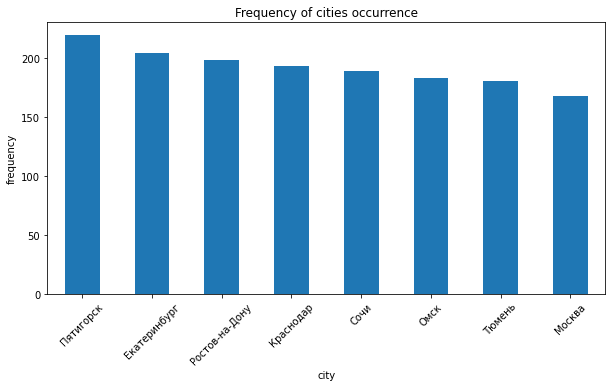

In [21]:
users.pivot_table(index='city', values='user_id', aggfunc='count').rename(columns={'user_id': 'frequency'}) \
    .sort_values('frequency', ascending=False)\
.plot(style='-',title='Frequency of cities occurrence', figsize=(10,5), kind='bar')

plt.xlabel('city')
plt.ylabel('frequency')
plt.xticks(rotation=45)
plt.legend().remove()
plt.show()

Pyatigorsk is most often found in the dataset - 219 times, Moscow is least common - 168 times.

### Task 2. Ratio of users with and without a subscription;

In [22]:
sub_share = pd.pivot_table(users,
                       index='subscription_type',
                       values='user_id',
                       aggfunc=[len])\
          .div(len(users.index))\
          .mul(100)
sub_share.columns = ['ratio']
sub_share

,ratio
subscription_type,
free,54.432855
ultra,45.567145


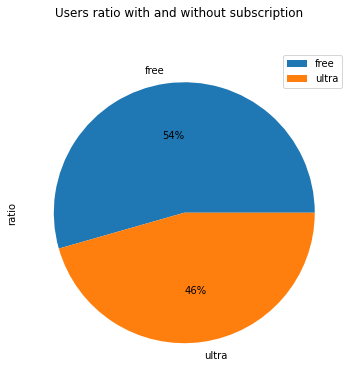

In [23]:
sub_share.plot(kind='pie', autopct = '%1.0f%%', title ='Users ratio with and without subscription', figsize=(6,6), subplots=True)
plt.show()

Almost 55% of users use the service without a subscription. 45%, respectively, with a subscription.

### Task 3. User's age;

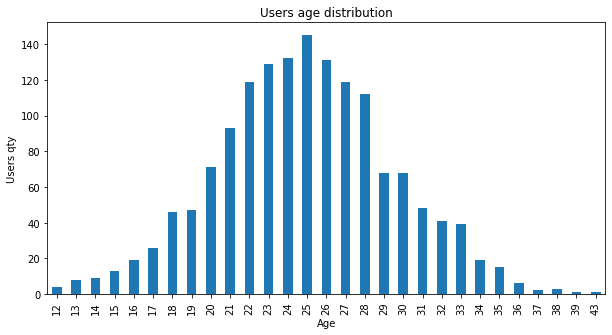

In [24]:
users.pivot_table(index='age', values='user_id', aggfunc='count')\
.plot(style='-',title='Users age distribution', figsize=(10,5), kind='bar')

plt.xlabel('Age')
plt.ylabel('Users qty')
plt.legend().remove()
plt.show()

In [25]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

The age distribution graph among users is very similar to the normal distribution with an estimated true average at the point of 25 years, that is, about 50% of users are people under 25 years old. The minimum age is 12, the maximum is 43. There is reason to believe that the data is correct.

### Task 4. Distance per 1 ride per user;

In [26]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

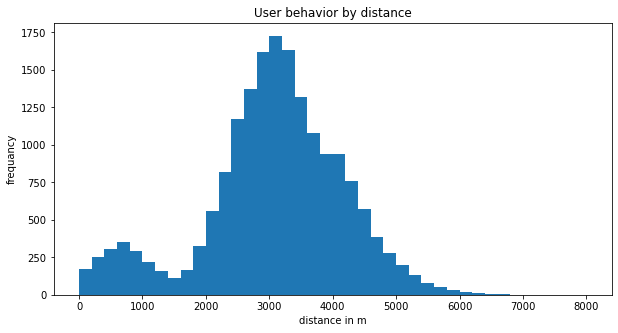

In [27]:
#limit data till 8000 m due to max value distribution is on around 8000
rides.plot(kind='hist', title='User behavior by distance', y='distance', bins=40, grid=False, range=(0, 8000), figsize=(10,5))

plt.xlabel('distance in m')
plt.ylabel('frequancy')
plt.legend().remove()
plt.show()

User behavior by distance is following - min. distance of trip is 86 meters, max is  7211 meters. Most often, distance that users traveled was about 3,000 meters.

### Task 5. Rides duration.

In [28]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

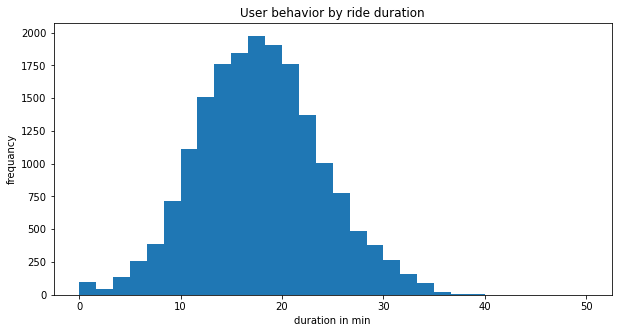

In [29]:
#limit data till 50 min due to max value distribution is on around 50
rides.plot(kind='hist', title='User behavior by ride duration', y='duration', bins=30, grid=False, range=(0, 50), figsize=(10,5))

plt.xlabel('duration in min')
plt.ylabel('frequancy')
plt.legend().remove()
plt.show()

User behavior by ride duration is folowing - min. duration of ride is 0.5 minutes,  max is approximately 41 minutes. Most often, ride duration is about 16-18 minutes.

**Section summary**. We conducted a exploratory analysis of users, their rides and identified the following patterns:
- 55% of users of the service without a subscription, 45% - with a subscription.
- the average age of the user is 25 years. The maximum age is just over 40 years.
- the average distance per trip is 3,100 meters.
- the average trip duration is about 18 minutes.

Data, with normal distribution, looks correct, there are no explicit anomalies, errors of a technical/human nature. It means that we can proceed to the next steps.

## 4. Data merging

### Task 1. Merging data of users, rides and subscriptions to uniformed dataframe.

In [30]:
# checking initial dataframes dimensions
print(users.shape)
print(rides.shape)
print(subscript.shape)

(1534, 5)
(18068, 5)
(2, 4)


In [31]:
# merging dataframes sequentially
merged_data = users.merge(rides)

In [32]:
merged_data = merged_data.merge(subscript)

In [33]:
# display merged dataframe
merged_data

,user_id,name,age,city,subscription_type,distance,duration,date,month_of_date,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [34]:
# checking missing values after data merging
merged_data.isna().mean()

user_id              0.0
name                 0.0
age                  0.0
city                 0.0
subscription_type    0.0
distance             0.0
duration             0.0
date                 0.0
month_of_date        0.0
minute_price         0.0
start_ride_price     0.0
subscription_fee     0.0
dtype: float64

### Task 2. Create new 2 dataframes from merged dataframe:
 - with user data without subscription;

In [35]:
free_users = merged_data.query('subscription_type == "free"')
free_users

,user_id,name,age,city,subscription_type,distance,duration,date,month_of_date,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


- with user data with subscription.

In [36]:
ultra_users = merged_data.query('subscription_type == "ultra"')
ultra_users

,user_id,name,age,city,subscription_type,distance,duration,date,month_of_date,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


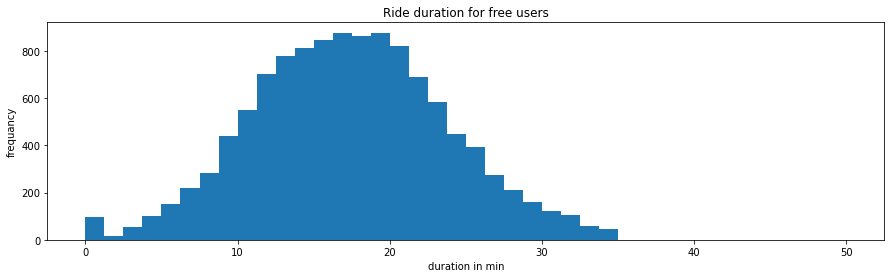

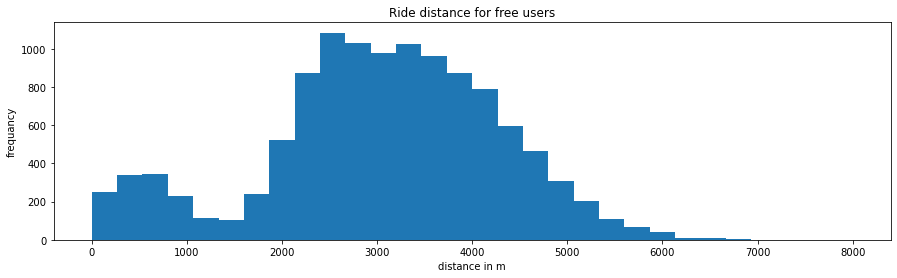

In [37]:
free_users.plot(kind='hist', title='Ride duration for free users', y='duration', bins=40, grid=False, range=(0, 50), figsize=(15,4))
plt.xlabel('duration in min')
plt.ylabel('frequancy')
plt.legend().remove()
plt.show()

free_users.plot(kind='hist', title='Ride distance for free users', y='distance', bins=30, grid=False, range=(0, 8000), figsize=(15,4))
plt.xlabel('distance in m')
plt.ylabel('frequancy')
plt.legend().remove()
plt.show()

Most rides by distance are in the range of 2400-3700 m, duration of ride is 12-22 minutes. The peaks  are 16 minutes and 2500 meters.
There are several ride distance up to 1000 meters, perhaps,in these cases, scooters are used when changing public transport to a scooter, if destination within 1000 m (when walking is still long enough).

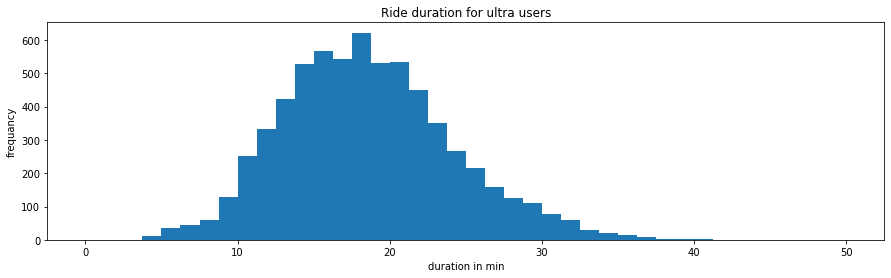

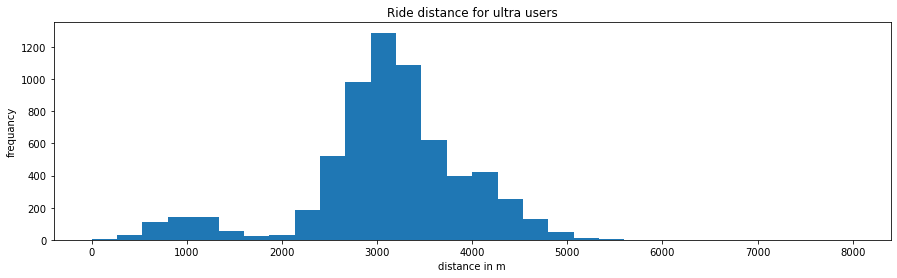

In [38]:
ultra_users.plot(kind='hist', title='Ride duration for ultra users', y='duration', bins=40, grid=False, range=(0, 50), figsize=(15,4))
plt.xlabel('duration in min')
plt.ylabel('frequancy')
plt.legend().remove()
plt.show()

ultra_users.plot(kind='hist', title='Ride distance for ultra users', y='distance', bins=30, grid=False, range=(0, 8000), figsize=(15,4))
plt.xlabel('distance in m')
plt.ylabel('frequancy')
plt.legend().remove()
plt.show()

The majority of rides by distance fall within the range of 2700-3400 meters, and by duration - 14-21 minutes. Peaks occur at 18 minutes and 3000 meters. It can be assumed that there is a correlation between ultra users and increased trip distance (users with long and more frequent rides may benefit from having a subscription rather than paying for each minute).

**Section summary**
Combined data and learned  behavior of each type of user based on distance and duration of trips:
 - *Free users*. Most rides by distance are in the range of 2400-3700 m, duration of ride is 12-22 minutes. The peaks  are 16 minutes and 2500 meters. There are several ride distance up to 1000 meters, perhaps,in these cases, scooters are used when changing public transport to a scooter, if destination within 1000 m (when walking is still long enough).
 - *Ultra users*. The majority of rides by distance fall within the range of 2700-3400 meters, and by duration - 14-21 minutes. Peaks occur at 18 minutes and 3000 meters. It can be assumed that there is a correlation between ultra users and increased trip distance (users with long and more frequent rides may benefit from having a subscription rather than paying for each minute).

## 5. Revenue calculation

### Task 1. Creating a dataframe with aggregated rides data based on the dataframe with combined data from 4 sections: finding the total distance, number of rides, and total ride duration for each user per each month.

In [39]:
# rounding each value with help of np.ceil() in duration column 
merged_data['duration'] = np.ceil(merged_data['duration'])

In [40]:
sum_data = pd.pivot_table(merged_data,
                           index=['month_of_date', 'user_id'],
                           values = ['distance', 'duration', 'name', 'subscription_type'],
                           aggfunc = {'distance': sum, 
                                      'duration' : sum, 
                                      'name' : len, 
                                      'subscription_type' : min})

In [41]:
sum_data.sort_values(by='month_of_date').head(20)

distance  duration  name subscription_type
month_of_date user_id                                                
1             1         7027.511294      42.0     2             ultra
              1061     12637.249630      43.0     3              free
              1063      3276.362299      10.0     1              free
              1064      5297.324649      15.0     1              free
              1065     14547.099333      99.0     4              free
              1066      2809.064949      19.0     1              free
              1067      3864.900780      22.0     1              free
              1069      7007.076943      53.0     3              free
              1071      3635.094136      15.0     1              free
              1072      2498.615999      11.0     1              free
              1073      2945.802455      16.0     1              free
              1074      2814.793386      22.0     1              free
              1075      5746.745124      29.0     3              free
              1077       114.036199      13.0     1              free
              1078      3748.219563      19.0     1              free
              1082      7250.124895      30.0     2              free
              1083      5848.881463      31.0     2              free
              1084      4615.097141      25.0     1              free
              1085     11410.546346      63.0     3              free
              1086      4044.280322      18.0     1              free

In [42]:
# after agregation. let's check missing values
sum_data.isna().mean()

distance             0.0
duration             0.0
name                 0.0
subscription_type    0.0
dtype: float64

### Task 2. Add column with monthly revenue

In [43]:
# writing a function to calculate  monthly revenue for each user type.
def month_revenue(row):
    if row['subscription_type'] == 'ultra':
        return 6 * row['duration'] + 199
    elif row['subscription_type'] == 'free':
        return 8 * row['duration'] + 50 * row['name']
    else:
        return 'No that sub'
    
sum_data['month_revenue'] = sum_data.apply(month_revenue, axis=1)
sum_data.head(10)

distance  duration  name subscription_type  \
month_of_date user_id                                                  
1             1        7027.511294      42.0     2             ultra   
              3        3061.777147      13.0     1             ultra   
              5        3914.646990      13.0     1             ultra   
              7        6478.080979      28.0     2             ultra   
              12       3577.151148      33.0     1             ultra   
              13       6687.987446      42.0     2             ultra   
              14       7699.643820      35.0     2             ultra   
              15       4187.621459      39.0     1             ultra   
              20       3516.719208      29.0     1             ultra   
              22       3058.692225      13.0     1             ultra   

                       month_revenue  
month_of_date user_id                 
1             1                451.0  
              3                277.0  
              5                277.0  
              7                367.0  
              12               397.0  
              13               451.0  
              14               409.0  
              15               433.0  
              20               373.0  
              22               277.0

**Section summary**
 - created a dataframe with aggregated rides data based on the dataframe with combined data from 4 sections: finding the total distance, number of rides, and total ride duration for each user per each month.
 - calculated  monthly revenue for each user type.

## 6. Hypotheses testing

###  Task 1. Testing whether ultrs users spend more time on rides. If so, users with a subscription may be "more profitable" for the company.

Hypothesis test: users with subscription spend more time for rides than users without subscription.

H_0: Duration of ultra users = duration of free users

H_1: Duration of ultra users > duration of free users

alpha = 0.05

In [44]:
# conducting statistical t-test with alpha=0.05
ultra = ultra_users['duration'] 

free = free_users['duration']

results = st.ttest_ind(ultra, 
                       free,
                       alternative = 'greater')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Reject null hypothesis')
else:
    print('Null hypothesis could not be rejected')

1.2804098316645613e-34
Reject null hypothesis


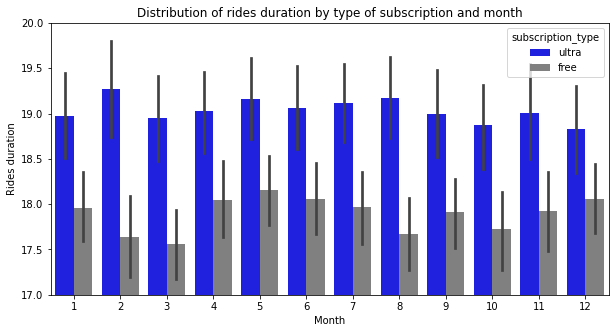

In [45]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x = 'month_of_date',
            y = 'duration',
            hue = "subscription_type",
            data = merged_data,
            palette = ['blue', 'grey'])
ax.set_title('Distribution of rides duration by type of subscription and month')
ax.set(xlabel='Month', ylabel='Rides duration')
ax.set_ylim(17, 20) # limit values on y axis to show seasonality
plt.show()

As confirmation of conducted test, which led us to decision to reject the hypothesis of equality of rides duration by subscription type, visualization also assists. Graph illustrates that users with a subscription tend to use the scooter longer compared to users without a subscription. This trend is observed from month to month.
Also we see that `ultra` users are constantly use scooter without changes within months, but `free` users are affected by seasonal fluctuations.

### Task 2. Distance of 1 ride as 3130 m is optimal in terms of scooter wear and tear. Is it true that average  distance for ultra user per 1 ride not higher than 3130 m?

Hypothesis test: Ultra users ride more than 3130 m in average.

H_0: Distance of ultra users = distance is 3130 meters

H_1: Distance of ultra users > distance is 3130 meters

alpha = 0.05

In [46]:
ultra_distance = ultra_users['distance'] 

target_value = 3130

results = st.ttest_1samp(ultra_distance, 
                       target_value,
                       alternative = 'greater')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Reject null hypothesis')
else:
    print('Null hypothesis could not be rejected')

0.9195368847849785
Null hypothesis could not be rejected


We cannot say that distance rided by ultra users exceeds 3130 meters.

### Task 3. Testing hypothesis of  monthly revenue: Is monthly revenue of ultra users higher than of free users?

Hypothesis test: monthly revenue of ultra users higher than of free users.

H_0: Monthly revenue of ultra users = Monthly revenue of free users

H_1: Monthly revenue of ultra users > Monthly revenue of free users

alpha = 0.05

In [47]:
ultra_month_revenue = sum_data.loc[sum_data.subscription_type == 'ultra', 'month_revenue']
free_month_revenue = sum_data.loc[sum_data.subscription_type == 'free', 'month_revenue']

results = st.ttest_ind(ultra_month_revenue, 
                       free_month_revenue,
                       alternative = 'greater')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


We can assume that revenue from users on ultra subscription exceeds revenue from users without a subscription.

### Task 4. Imagine a situation: the technical team of the service has updated the servers with which the mobile application interacts. She hopes that because of this, the number of calls to technical support has significantly decreased. Some file contains data for each user on the number of requests before and after the update. What stat test would you need to test this hypothesis?

We will use the hypothesis of equality of means for dependent (paired) samples.

The hypotheses will be formulated as follows:

* H0: μ1 = μ2
* H1: μ1 ≠ μ2

Where μ1 and μ2 represent the mean values of the number of support requests before and after the change, respectively.

The method to be used for comparison: scipy.stats.ttest_rel().

**Summary section**. Tested hypoteses based on the following info:
- users with subscription spend more time riding than users on a free plan. Using t-test and visualization, users with subscription riding longer than users without a subscription.
- users with subscription do not ride more than 3,130 meters per ride on average. According to t-test results, we cannot say that distance rided by users on the ultra tariff does not exceed 3130 meters.
- monthly revenue of users with subscription is higher than the monthly revenue of users without subscription. Based on the t-test results, we can assume that revenue from users on  ultra subscription exceeds revenue from users without subscription.

## 7. Distributions

### Task 1. The GoFast marketing department has been given a task: it is necessary to hold an action with the distribution of promo codes for one month of free subscription, where at least 100 existing customers must renew this subscription. User can either cancel it or extend it by making the appropriate payment at the end of the subscription period
This promotion has already been held before , as result, only 10% of users renew their subscription after free trial. Find out what is the minimum number of promo codes you need to send out for reaching probability of not fulfilling the plan in 5%. Select parameters of distribution describing this situation, build distribution graph and formulate answer to the question about the number of promo codes.

By the condition of task, guess timeframe is important ('one month subscription as free trial'). Therefore, to find the probability of not fulfilling the plan within 5%, we will use the approximation of binomial distribution by the Poisson distribution. We know probability of renewing subscription (p= 0.1), how many customers should renew subscription (100), probability of not fulfilling the plan is 5%, we will find it by using the `cdf` function.
We know that in order to reduce the probability of non-fulfillment of the plan of 100 subscriptions, with a small p = 0.1, a sufficiently large n is needed. 
Let's chosse it below:

In [48]:
threshold = 100
lmbd = 1170*0.1

print('Probability of not fulfilling the plan is not higher than 5%:', poisson.cdf(threshold - 1, lmbd))

Probability of not fulfilling the plan is not higher than 5%: 0.049973377638439065


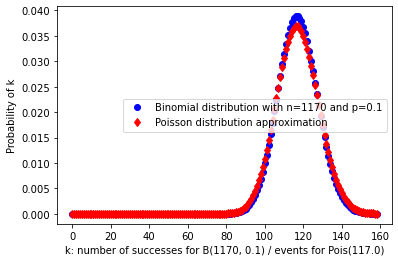

Average difference in probabilities per value: 0.00031992535628943365


In [49]:
# Set the parameters of the binomial distribution
n = 1170
p = 0.1

# Calculate the parameter lambda for Poisson approximation
lmbd = n * p

# Set the range of values for k for plotting:
# Add 4 standard deviations to the mean of the binomial distribution
std_binom = np.sqrt(n * p * (1 - p))
max_value = int(n * p + 4 * std_binom)

binom_probs = []
poisson_probs = []
# For all values from 0 to max_value
for k in range(max_value + 1):
    # Calculate probability values for the binomial distribution and Poisson distribution
    binom_prob = binom.pmf(k, n, p)
    poisson_prob = poisson.pmf(k, lmbd)
    # Add values to the corresponding lists
    binom_probs.append(binom_prob)
    poisson_probs.append(poisson_prob)

# Plot the graphs
plt.plot(range(max_value + 1), binom_probs, 'bo', label=f'Binomial distribution with n={n} and p={p}')
plt.plot(range(max_value + 1), poisson_probs, 'rd', label='Poisson distribution approximation')
plt.xlabel(f'k: number of successes for B{n,p} / events for Pois({lmbd})')
plt.ylabel('Probability of k')
plt.legend()
plt.show()

# Find the total approximation error:
error_values = []
for i in range(max_value + 1):
    error = abs(binom_probs[i] - poisson_probs[i])
    error_values.append(error)

print('Average difference in probabilities per value:', sum(error_values) / len(error_values))

According to the results of calculating probability of failure in about 5%, we can recommend marketing department distributing at least 1170 promo codes in order to get high probability of subscription renewal in 100 users and higher in a month.
We can also say that by visualizattion, our method of calculating N through approximation of binomial distribution by Poisson distribution is optimal, since error between distributions after aprozimation is almost 0.

### Task 2. The marketing department sends push notifications to customers in mobile app. Customers can open it or not open it. It is known that about 40% of received clients open notifications. Department plans to send out 1 million notifications. Use the approximation to build approximate distribution graph and estimate probability that no more than 399.5 thousand users open notification.

To find the probability of opening notification no more than 399.5 thousand times, we use normal binomial distribution approximation. We know probability of opening a notification (p=0.4), how many clients should open notification at most (399.5K), if total of 1 million notifications will be sent. Find it using the `cdf` function.

In [50]:
# Set the parameters of the binomial distribution
n = 1000000
p = 0.4

# Set the parameters of the normal distribution equal to
# the mean and variance of the binomial distribution
mu = n * p
sigma = sqrt(n * p * (1 - p))

# Set the normal distribution
distr = st.norm(mu, sigma)

# Calculate the probability of the left tail below 399.5 thousand
result = distr.cdf(399500)
print('Probability that no more than 399.5k users open notification:', result)

Probability that no more than 399.5k users open notification: 0.15371708296369768


Further visualizating approximation

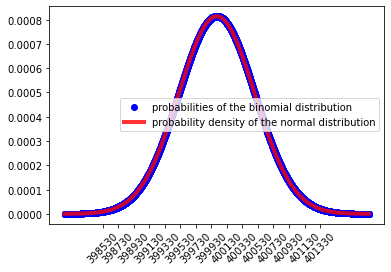

The condition is met


In [51]:
# Define a function that returns <num> numbers,
# uniformly distributed from <start> to <stop>
# (needed for visualizing the normal distribution)
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result

# Set the parameters of the binomial distribution
n = 1000000
p = 0.4

# Set the interval boundaries for building the approximation -
# from n*p minus 4 standard deviations of the binomial distribution
# to n*p plus 4 standard deviations of the binomial distribution
# (where the probabilities of values are almost non-zero)
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))

# Define a set of values ​​of the binomial distribution in the selected interval:
# all non-negative integers from left to right
x = list(range(max(0, left), right))
# Plot the graph of the binomial distribution
ax = plt.subplot()
# Use blue circle markers
ax.plot(x, binom.pmf(x, n, p), 'bo', 
	      label='probabilities of the binomial distribution')

# Set the parameters of the normal distribution equal to
# the mean and variance of the binomial distribution
mu = n * p
sigma = sqrt(n * p * (1 - p))

# Plot the graph of the normal distribution:
# get a list of 100 numbers from left to right
x = linspace(left, right, 100)
# Use a red line with a width of 4 and transparency of 0.8
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=4, alpha=0.8, label='probability density of the normal distribution')

# Set the x-axis labels within ± 3 standard deviations from the mean
# (the last argument in the range method is the interval between labels)
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 200))
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks, rotation=45)

# Set the optimal location for the legend and display the plot
ax.legend(loc='best')
plt.show()

# Display whether our approximation condition is met:
# whether mu ± 3 sigma is in the interval from 0 to n:
if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('The condition is met')
else:
    print('The condition is not met')

Probability of receiving notifications up to 399.5 thousand times is approximately 15%. Obviously, this probability is not small. We will pass this information to the marketing department for further business decisions.

By plotting a graph based on the obtained data, we can assert that our method of calculating probability using the approximation of the binomial distribution by the normal distribution is optimal, as the approximation condition is met.

**Section summary** 
- calculated probability of failure to complete plan at 5%, we can recommend distributing at least 1170 promo codes in order to receive subscription renewal from 100 users with a high probability in a month.
- calculated the probability of opening notification no more than 399.5 thousand times, and it was about 15%. Obviously, the probability value is not small. We passed this information to marketing department for making subsequent business decisions.

<div style="border:solid blue 3px; padding: 20px">

## Main summary
    
During the project, data analysis of the GoFast scooter rental service  was conducted. Some hypotheses were tested and recommendations were formulated that could help business to grow.

1. Data preprocessing was done on 3 dataframes - checked for missing values, added month by using `pandas`, found explicit duplicates, and removed them from users dataframe with subsequent index restoration.

2. Exploratory analysis of users and rides were conducted, revealing the following patterns:
   - 55% of service users are withoutsubscription, 45% are with subscription.
   - average age of users is 25 years. The maximum is just over 40 years.
   - average distance per ride is 3100 meters.
   - average ride duration is about 18 minutes.

3. Merging dataframes and learned behavior of each type of user by distance and duration of 1 ride:
   - *Free users*. Most rides by distance are in range of 2400-3700 m, and by ride duration - 12-22 minutes. Peaks are at 16 minutes and 2500 meters. There are some users with ride distance of up to 1000 meters, possibly scooters are used when users are switching public transport to scooters if the destination is about 1000 meters away (when walking is still quite long).
   - *Ultra users*. Most rides by distance are in the range of 2700-3400 m, and by ride duration - 14-21 minutes. Peaks are at 18 minutes and 3000 m. Guess there is connection between using a subscription and increasing ride distance (users with longer and more frequent rides are normally having a subscription rather than paying for every minute).

4. Calculated and added monthly revenue for each type of user to a new column.

5. Hypotheses were tested based on the data:
- users with subscription spend more time riding than users on a free plan. Using t-test and visualization, users with subscription riding longer than users without a subscription.
- users with subscription do not ride more than 3,130 meters per ride on average. According to t-test results, we cannot say that distance rided by users on the ultra tariff does not exceed 3130 meters.
- monthly revenue of users with subscription is higher than the monthly revenue of users without subscription. Based on the t-test results, we can assume that revenue from users on  ultra subscription exceeds revenue from users without subscription.

6. Developed recommendations based on the use of statistical methods for planned activities for marketing department, namely:
   - it is recommended distributing no less than 1170 promo codes to achieve a high probability of getting subscription renewals from 100 users after a month in case of failure to achieve the plan by 5%.
   - calculated probability of opening push notification no more than 399.5 thousand times with distribution of 1 million notifications and probability of opening them by users at 40%. Obviously, the calculated probability value (15%) is not small. Passed this information to marketing department for making subsequent business decisions.